<a href="https://colab.research.google.com/github/DeepMalviya1/YBI-Foundation/blob/main/Used_car_price_prediction_Deep_Malviya_YBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("tab10")


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Used car YBI/UsedCarPrice.csv')

# Data Observation

In [3]:
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [5]:
data.describe(include = 'all')

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
count,4340,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,29,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,1280,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


# Check Null Values and Unique Values

In [6]:
data.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.nunique()

Brand              29
Model            1491
Year               27
Selling_Price     445
KM_Driven         770
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

In [8]:
data.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Data Visualization and Encoding

In [9]:
cat = [ 'Fuel', 'Seller_Type', 'Transmission', 'Owner']

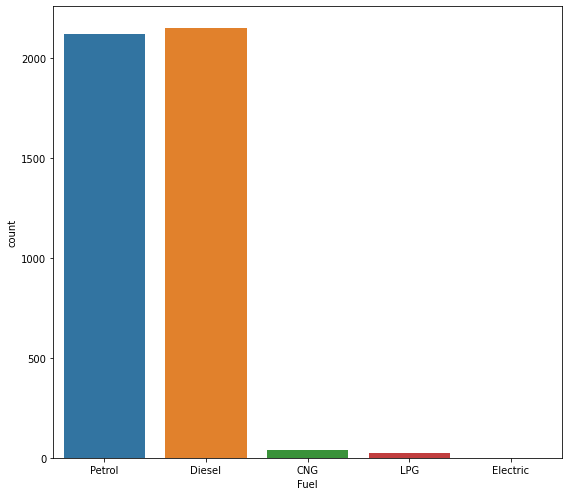

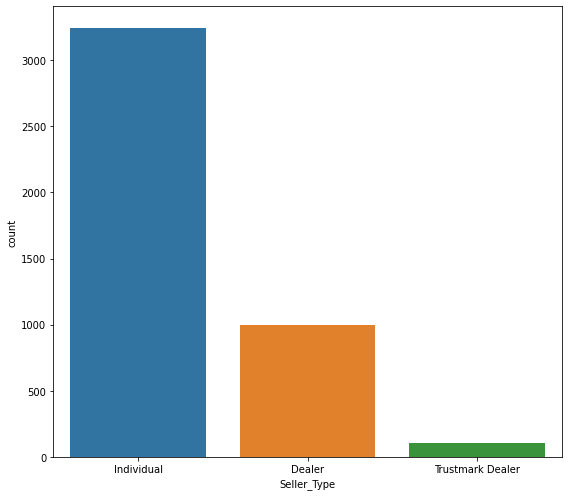

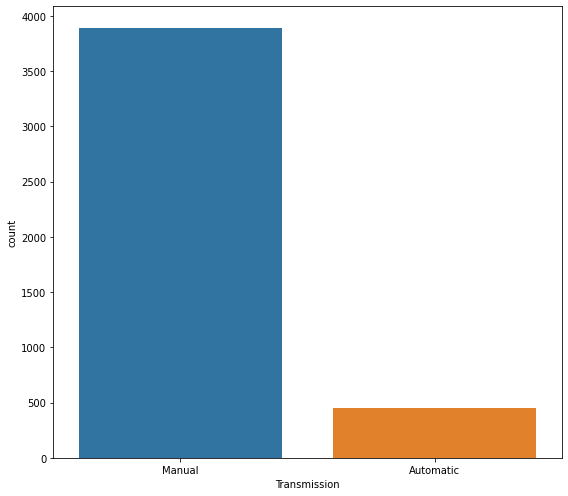

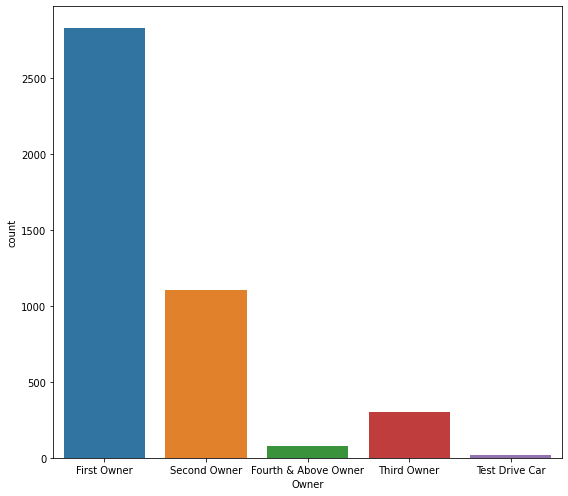

In [10]:
for i in cat:
  plt.figure(figsize= (8,7))
  sns.countplot(x = data[i])
  plt.tight_layout()
  plt.show()

In [11]:
convert = {"Fuel":      {"Petrol" : 1, "Diesel" : 2, "CNG" : 3, "LPG" : 4, "Electric" : 5},
          "Seller_Type":     {"Individual" : 1, "Dealer" : 2, "Trustmark Dealer" : 3},
          "Transmission":        {"Manual" : 1, "Automatic" : 2},
          "Owner":       {"First Owner" : 1, "Second Owner" : 2, "Third Owner" : 3, "Fourth & Above Owner" : 4, "Test Drive Car" : 5}}


In [12]:
data[cat] = data[cat].replace(convert)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   int64 
 6   Seller_Type    4340 non-null   int64 
 7   Transmission   4340 non-null   int64 
 8   Owner          4340 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 305.3+ KB


In [14]:
data.describe()

,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.00000
mean,2013.090783,5.041273e+05,66215.777419,1.531336,1.276037,1.103226,1.46659
std,4.215344,5.785487e+05,46644.102194,0.549621,0.496892,0.304289,0.74033
min,1992.000000,2.000000e+04,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2011.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,1.00000
50%,2014.000000,3.500000e+05,60000.000000,2.000000,1.000000,1.000000,1.00000
75%,2016.000000,6.000000e+05,90000.000000,2.000000,2.000000,1.000000,2.00000
max,2020.000000,8.900000e+06,806599.000000,5.000000,3.000000,2.000000,5.00000


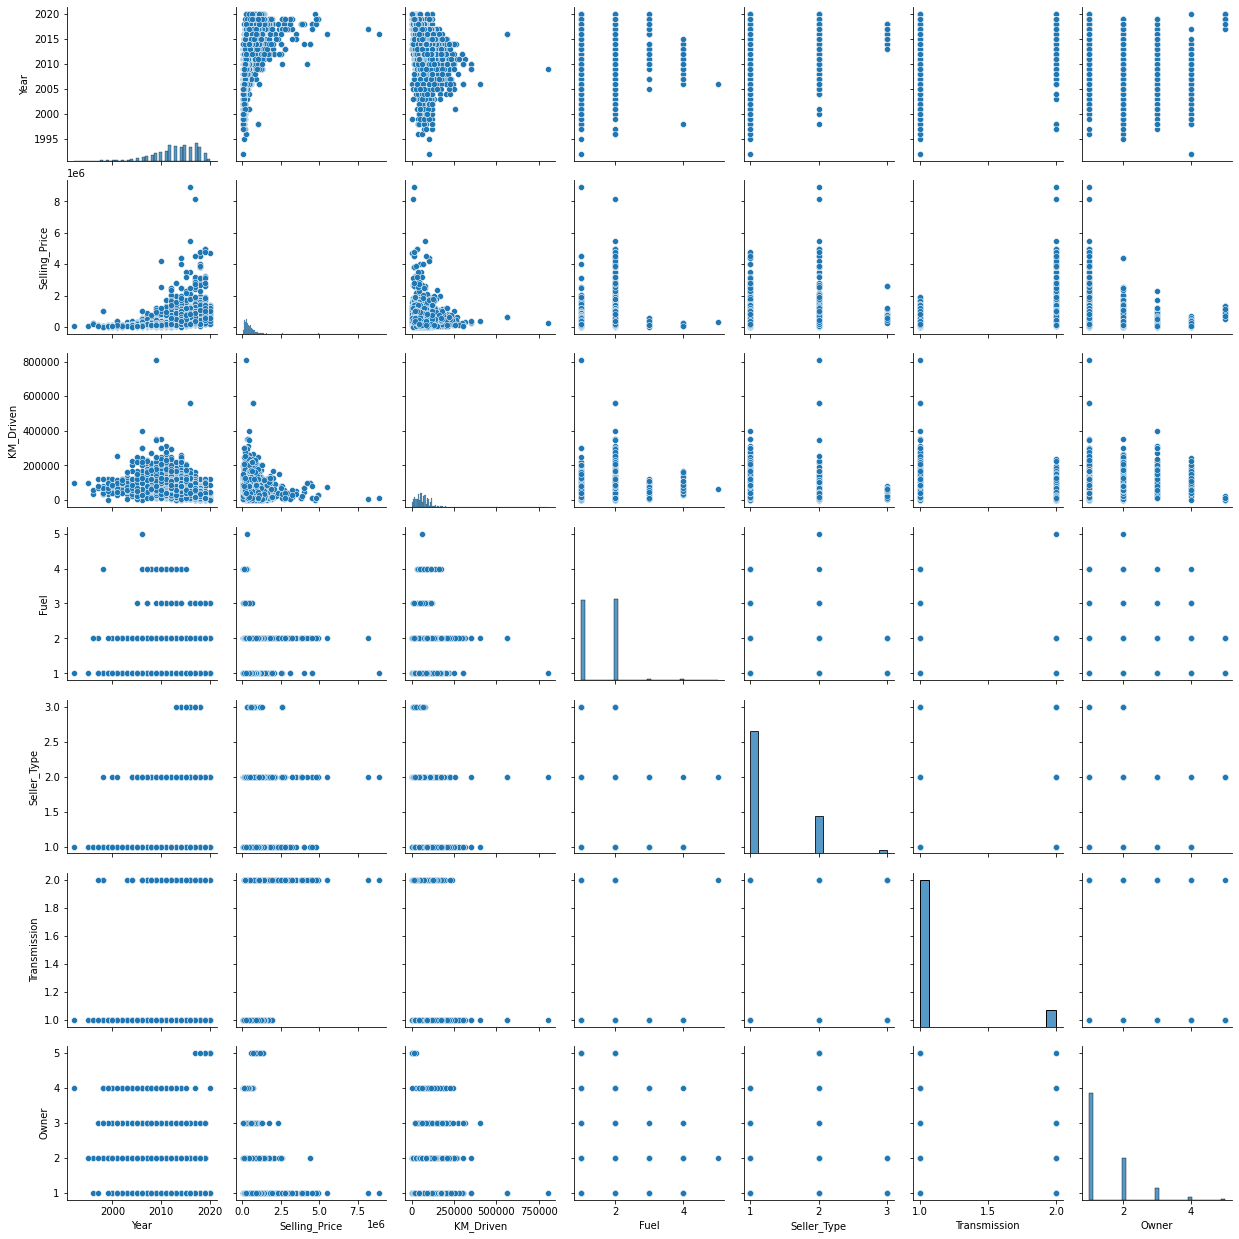

In [15]:
sns.pairplot(data)

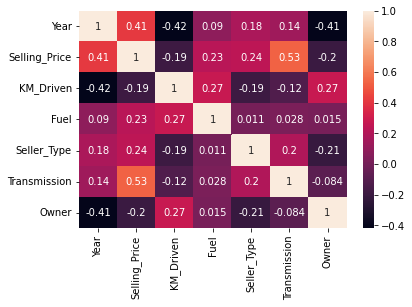

In [16]:
corr = data.corr()
sns.heatmap(corr, annot = True)

# Data Split

In [17]:
X = data[['Year','KM_Driven', 'Fuel','Seller_Type', 'Transmission']]
y = data['Selling_Price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42529)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3038, 5), (1302, 5), (3038,), (1302,))

# Scaling

In [20]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

# Modelling and Result

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
pred_knn = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


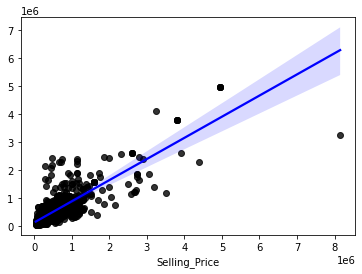

In [23]:
sns.regplot(y_test,pred_knn,scatter_kws={"color": "black"}, line_kws={"color": "blue"})

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print(r2_score(y_test,pred_knn))

0.7026366740003105


In [26]:
print(mean_squared_error(y_test,pred_knn,squared = False ))

333849.87510527176
